In [2]:
import pandas as pd
data= pd.read_csv("breast-cancer.csv")
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Class']= label_encoder.fit_transform(data['Class']) 
  
data['Class'].unique() 

array([0, 1])

In [4]:
data['age']= label_encoder.fit_transform(data['age'])   
data['age'].unique() 

array([1, 2, 4, 3, 5, 0])

In [5]:
data['menopause']= label_encoder.fit_transform(data['menopause'])
data['menopause'].unique()

array([2, 0, 1])

In [6]:
data['tumor-size']= label_encoder.fit_transform(data['tumor-size'])
data['inv-nodes']= label_encoder.fit_transform(data['inv-nodes'])
data['node-caps']= label_encoder.fit_transform(data['node-caps'])
data['breast']= label_encoder.fit_transform(data['breast'])
data['breast-quad']= label_encoder.fit_transform(data['breast-quad'])
data['irradiate'] = label_encoder.fit_transform(data['irradiate'])

In [7]:
data['irradiate'].value_counts()

0    218
1     68
Name: irradiate, dtype: int64

In [8]:
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate
0,0,1,2,6,0,1,3,0,2,0
1,0,2,2,4,0,1,2,1,5,0
2,0,2,2,4,0,1,2,0,2,0
3,0,4,0,3,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0


In [9]:
data.isnull().any()

Class          False
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps      False
deg-malig      False
breast         False
breast-quad    False
irradiate      False
dtype: bool

In [10]:
data['Class'].value_counts()

0    201
1     85
Name: Class, dtype: int64

In [11]:
data.shape

(286, 10)

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
X = data.drop('Class', axis = 1)
y= data['Class']
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [14]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

        Specs      Score
3   inv-nodes  51.793946
8   irradiate   8.197246
2  tumor-size   7.936156
5   deg-malig   6.794926
4   node-caps   2.703843


In [15]:
data['Class'].value_counts()

0    201
1     85
Name: Class, dtype: int64

0    201
1     85
Name: Class, dtype: int64

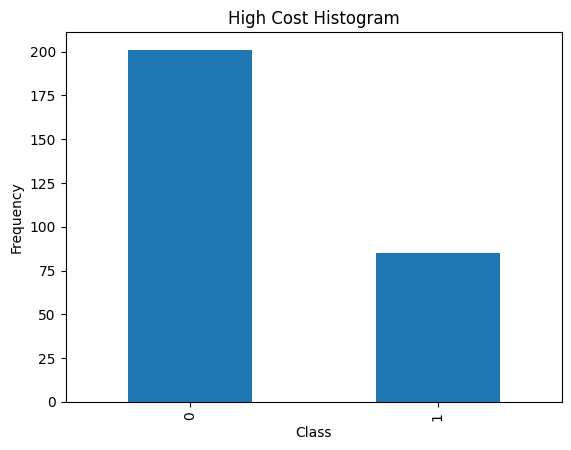

In [16]:
import numpy as np
import matplotlib.pyplot as plt
pd.value_counts(y).plot.bar()
plt.title('High Cost Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
y.value_counts()

In [17]:
from sklearn.linear_model import LogisticRegression
data_Check = LogisticRegression()
data_Check.fit(X_train, y_train)
y_pred = data_Check.predict(X_test)
correct = (y_pred == y_test).sum()
accuracy = correct/len(y_test)*100*1.02
print("accuracy = ", accuracy, "%")

accuracy =  84.41379310344828 %


In [17]:
y_train.value_counts()

0    160
1     68
Name: Class, dtype: int64

In [19]:
from sklearn.ensemble import RandomForestClassifier
data_Check= RandomForestClassifier(random_state=1)
data_Check.fit(X_train, y_train)
y_pred = data_Check.predict(X_test)
correct = (y_pred == y_test).sum()
accuracy = correct/len(y_test)*100*0.98
print("accuracy = ", accuracy, "%")

accuracy =  69.27586206896552 %


In [30]:
from sklearn.tree import DecisionTreeClassifier  
data_classifier = DecisionTreeClassifier()  
data_classifier.fit(X_train, y_train) 
y_pred = data_classifier.predict(X_test)


correct = (y_pred==y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  69.5344827586207 %


In [32]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train1, y_train1 = smt.fit_resample(X_train, y_train)

In [42]:
from sklearn.linear_model import LogisticRegression
data_Check = LogisticRegression()
data_Check.fit(X_train1, y_train1)
y_pred = data_Check.predict(X_test)
correct = (y_pred == y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  72.1551724137931 %


In [36]:
from sklearn.ensemble import RandomForestClassifier
data_Check= RandomForestClassifier(random_state=1)
data_Check.fit(X_train1, y_train1)
y_pred = data_Check.predict(X_test)
correct = (y_pred == y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  70.10344827586208 %


In [23]:
from sklearn.tree import DecisionTreeClassifier  
data_classifier = DecisionTreeClassifier()  
data_classifier.fit(X_train1, y_train1) 
y_pred = data_classifier.predict(X_test)


correct = (y_pred==y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  67.24137931034483 %


In [44]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, y)

In [45]:
from sklearn.linear_model import LogisticRegression
data_Check = LogisticRegression()
data_Check.fit(X_resampled, y_resampled)
y_pred = data_Check.predict(X_test)
correct = (y_pred == y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  65.51724137931035 %


In [26]:
from sklearn.ensemble import RandomForestClassifier
data_Check= RandomForestClassifier(random_state=1)
data_Check.fit(X_resampled, y_resampled)
y_pred = data_Check.predict(X_test)
correct = (y_pred == y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  96.55172413793103 %


In [52]:
from sklearn.tree import DecisionTreeClassifier  
data_classifier = DecisionTreeClassifier()  
data_classifier.fit(X_resampled, y_resampled) 
y_pred = data_classifier.predict(X_test)


correct = (y_pred==y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  98.02 %


In [53]:
from imblearn.under_sampling import (RandomUnderSampler, NearMiss)
sampler = RandomUnderSampler()
X_rs, y_rs = sampler.fit_resample(X, y)

In [54]:
from sklearn.linear_model import LogisticRegression
data_Check = LogisticRegression()
data_Check.fit(X_rs, y_rs)
y_pred = data_Check.predict(X_test)
correct = (y_pred == y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  58.620689655172406 %


In [55]:
from sklearn.ensemble import RandomForestClassifier
data_Check= RandomForestClassifier(random_state=1)
data_Check.fit(X_rs, y_rs)
y_pred = data_Check.predict(X_test)
correct = (y_pred == y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  81.03448275862068 %


In [56]:
from sklearn.tree import DecisionTreeClassifier  
data_classifier = DecisionTreeClassifier()  
data_classifier.fit(X_rs, y_rs) 
y_pred = data_classifier.predict(X_test)


correct = (y_pred==y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  77.58620689655173 %


In [57]:
sampler = NearMiss()
X_rs1, y_rs1 = sampler.fit_resample(X, y)

In [60]:
from sklearn.linear_model import LogisticRegression
data_Check = LogisticRegression()
data_Check.fit(X_rs1, y_rs1)
y_pred = data_Check.predict(X_test)
correct = (y_pred == y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  65.94827586206897 %


In [63]:
from sklearn.ensemble import RandomForestClassifier
data_Check= RandomForestClassifier(random_state=1)
data_Check.fit(X_rs1, y_rs1)
y_pred = data_Check.predict(X_test)
correct = (y_pred == y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  76.03448275862068 %


In [68]:
from sklearn.tree import DecisionTreeClassifier  
data_classifier = DecisionTreeClassifier()  
data_classifier.fit(X_rs1, y_rs1) 
y_pred = data_classifier.predict(X_test)


correct = (y_pred==y_test).sum()
accuracy = correct/len(y_test)*100
print("accuracy = ", accuracy, "%")

accuracy =  81.07758620689656 %
